In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored
import copy

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# OBS Datapoints start the 23/03 - 2022 - 00:00

In [2]:
import os
import pandas as pd

Emil = True

if Emil:
    base_path = r"C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data"
else:
    base_path = r"C:\Users\Gustav\Documents\Thesis\data\EV"



In [3]:
EV1 = pd.read_csv(os.path.join(base_path, "CD_1544.csv"))
EV2 = pd.read_csv(os.path.join(base_path, "CD_2067.csv"))

In [4]:
EV1.head(3)

energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
0                  0.0        0.0        0.0                 0.0  \
1                  0.0        0.0        0.0                 0.0   
2                  0.0        0.0        0.0                 0.0   

   max_effect of charger (kW)  minute of year  
0                        14.4             1.0  
1                        14.4             2.0  
2                        14.4             3.0

In [5]:
len(EV1)

525600

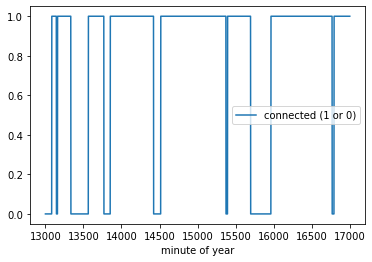

In [6]:
EV1[13000:17000].plot(x="minute of year", y="connected (1 or 0)");

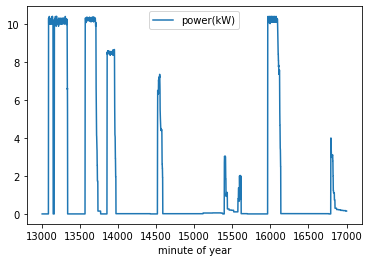

In [7]:
EV1[13000:17000].plot(x="minute of year", y="power(kW)");

In [8]:
# til at lave de op og nedregulerings bounds

liste_up = []
liste_down = []

for i in range(15392, 15697):
    if EV1['power(kW)'][i] == 0:
        liste_up.append(0)
        liste_down.append(0)
    elif EV1['power(kW)'][i] <= EV1['max_effect of charger (kW)'][i]-EV1['power(kW)'][i]:
        liste_up.append(EV1['power(kW)'][i]*5)
        liste_down.append(0)
    else:
        liste_up.append(EV1['power(kW)'][i])
        liste_down.append(EV1['power(kW)'][i]*5)


In [9]:
len(liste_up)

305

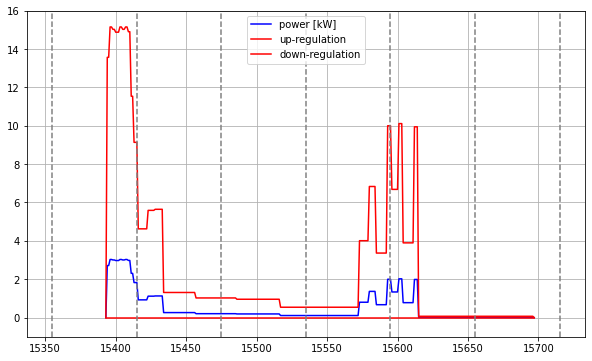

In [10]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values
y2 = EV1[15392:15697]["energy_resovior (%)"].values
y3 = EV1[15392:15697]["connected (1 or 0)"].values

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='power [kW]', color='blue')
#plt.plot(x, y2*10, label='energy_resovior (%)', color='green')
#plt.plot(x, y3, label='conncted', color='yellow')
plt.plot(x, liste_up, label='up-regulation', color='red')
plt.plot(x, liste_down, label='down-regulation', color='red')


# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15355, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)
#plt.axvline(x=15392, color='yellow', linestyle='-')
#plt.axvline(x=15697, color='yellow', linestyle='-')

# Show the plot
plt.grid(True)
plt.show()

The assumption is that a car will have 20% capacity when it connects to the charger and 80% when it's done.

It's also assumed that the operator is allowed to operate the battery between the battery capacity threshold 10-90% 

## Til møde 13/9

# plot 1

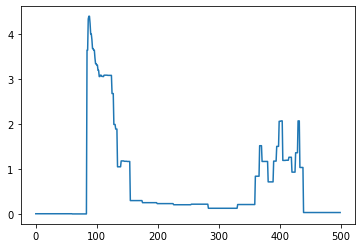

In [11]:
plt.plot(EV1[488100:488600]["power(kW)"].values)

In [12]:
print("1st hour interval: Max_power:", max(EV1[15360:15420]['power(kW)']), ", Min_power:", min(EV1[15360:15420]['power(kW)'])) 
print("2nd hour interval: Max_power:", max(EV1[15420:15480]['power(kW)']), ", Min_power:", min(EV1[15420:15480]['power(kW)']))
print("3rd hour interval: Max_power:", max(EV1[15480:15540]['power(kW)']), ", Min_power:", min(EV1[15480:15540]['power(kW)'])) 
print("4th hour interval: Max_power:", max(EV1[15540:15600]['power(kW)']), ", Min_power:", min(EV1[15540:15600]['power(kW)'])) 
print("5th hour interval: Max_power:", max(EV1[15600:15660]['power(kW)']), ", Min_power:", min(EV1[15600:15660]['power(kW)'])) 
print("6th hour interval: Max_power:", max(EV1[15660:15720]['power(kW)']), ", Min_power:", min(EV1[15660:15720]['power(kW)'])) 

1st hour interval: Max_power: 3.0299999939428197 , Min_power: 0.0
2nd hour interval: Max_power: 1.1291925443257127 , Min_power: 0.2050113891116065
3rd hour interval: Max_power: 0.2050113891116065 , Min_power: 0.10823812365604
4th hour interval: Max_power: 1.9999999959994377 , Min_power: 0.10823812365604
5th hour interval: Max_power: 2.022471906066944 , Min_power: 0.0138517618191978
6th hour interval: Max_power: 0.0138517618191978 , Min_power: 0.0


In [13]:
print("1st hour interval: Max_power:", EV1[15360:15420]['power(kW)'].idxmax(), ", Min_power:", EV1[15360:15420]['power(kW)'].idxmin()) 
print("2nd hour interval: Max_power:", EV1[15420:15480]['power(kW)'].idxmax(), ", Min_power:", EV1[15420:15480]['power(kW)'].idxmin())
print("3rd hour interval: Max_power:", EV1[15480:15540]['power(kW)'].idxmax(), ", Min_power:", EV1[15480:15540]['power(kW)'].idxmin()) 
print("4th hour interval: Max_power:", EV1[15540:15600]['power(kW)'].idxmax(), ", Min_power:", EV1[15540:15600]['power(kW)'].idxmin()) 
print("5th hour interval: Max_power:", EV1[15600:15660]['power(kW)'].idxmax(), ", Min_power:", EV1[15600:15660]['power(kW)'].idxmin()) 
print("6th hour interval: Max_power:", EV1[15660:15720]['power(kW)'].idxmax(), ", Min_power:", EV1[15660:15720]['power(kW)'].idxmin()) 

1st hour interval: Max_power: 15402 , Min_power: 15372
2nd hour interval: Max_power: 15427 , Min_power: 15456
3rd hour interval: Max_power: 15480 , Min_power: 15516
4th hour interval: Max_power: 15592 , Min_power: 15540
5th hour interval: Max_power: 15600 , Min_power: 15614
6th hour interval: Max_power: 15660 , Min_power: 15696


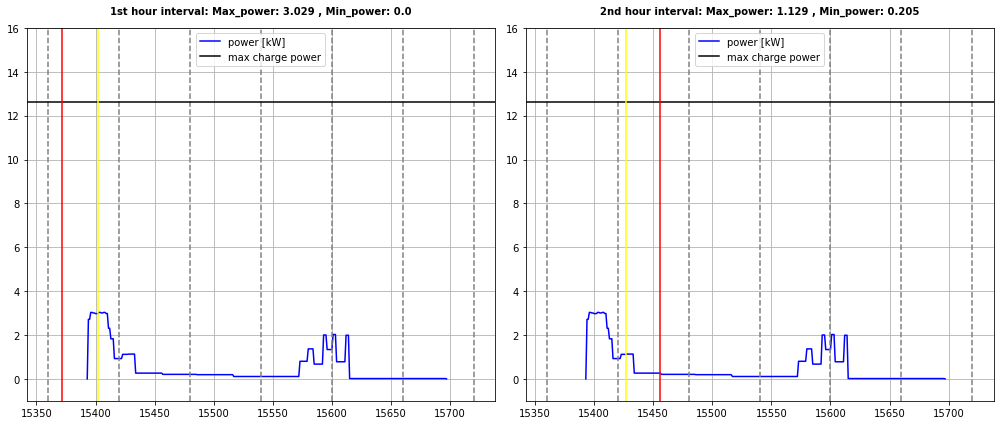

In [14]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15360:15420]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15420:15480]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("2nd hour interval: Max_power: 1.129 , Min_power: 0.205", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

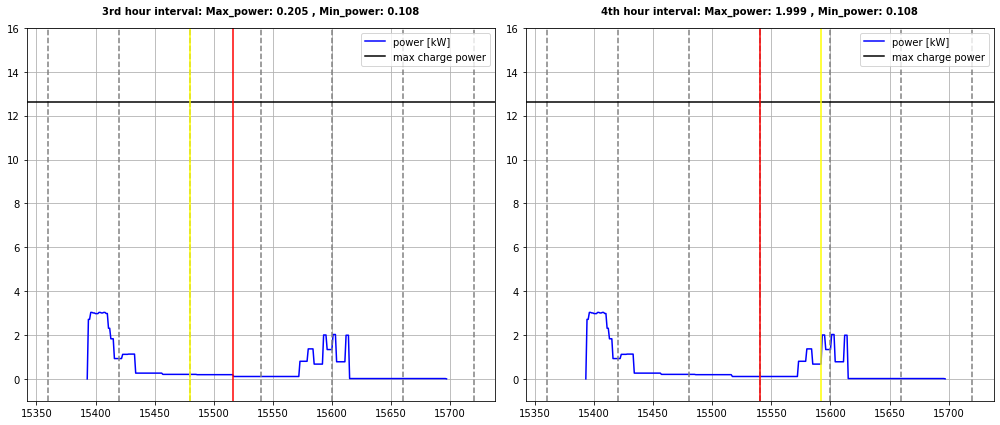

In [15]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15480:15540]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("3rd hour interval: Max_power: 0.205 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15540:15600]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("4th hour interval: Max_power: 1.999 , Min_power: 0.108", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

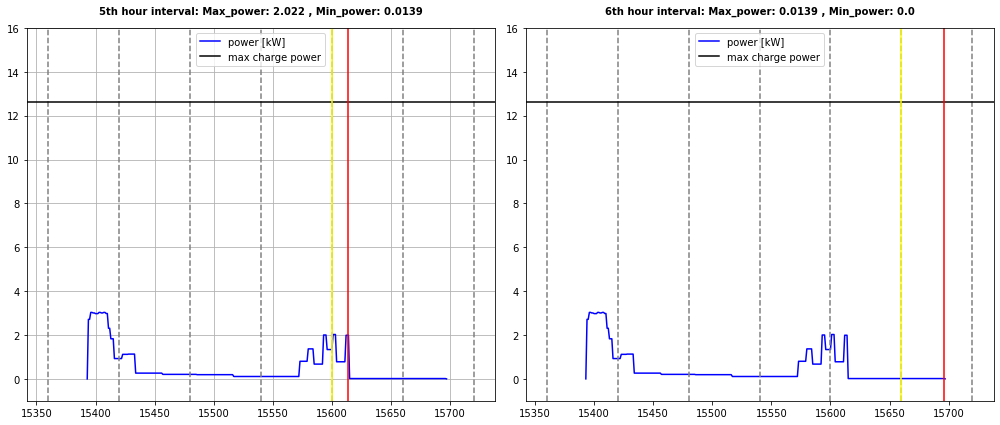

In [16]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15600:15660]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("5th hour interval: Max_power: 2.022 , Min_power: 0.0139", y=1.02, fontsize=10, fontweight='bold')

# grid
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(x, y1, label='power [kW]', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.axhline(y=max(EV1["power(kW)"].values), label='max charge power', color='black', linestyle='-')

# Displaying the legend
plt.legend()
plt.ylim(-1, 16)

# max values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmax(), color='yellow', linestyle='-')

# min values in a given hour
plt.axvline(x=EV1[15660:15720]['power(kW)'].idxmin(), color='red', linestyle='-')

# title
plt.title("6th hour interval: Max_power: 0.0139 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)


# Show the plot
plt.tight_layout()
plt.show()

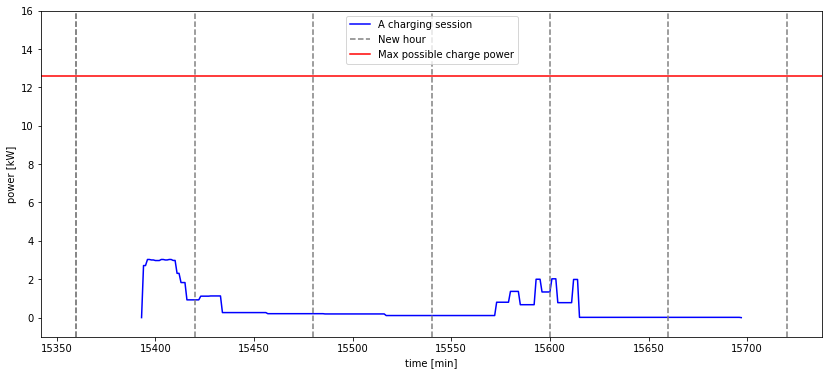

In [17]:
x  = EV1[15392:15697]["minute of year"].values
y1 = EV1[15392:15697]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(15360, 15725, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=15360, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

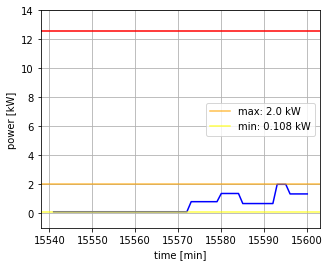

In [18]:
x  = EV1[15540:15600]["minute of year"].values
y1 = EV1[15540:15600]["power(kW)"].values

plt.figure(figsize=(5, 4))

plt.plot(x, y1, color='blue')

plt.axhline(y=max(EV1["power(kW)"].values), color='red', linestyle='-')

# Displaying the legend
plt.ylim(-1, 14)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# max values in a given hour
plt.axhline(y=max(EV1[15540:15600]['power(kW)'].values), color='orange', linestyle='-', alpha = 0.7, label="max: 2.0 kW")

# min values in a given hour
plt.axhline(y=min(EV1[15540:15600]['power(kW)'].values), color='yellow', linestyle='-', alpha = 0.7, label="min: 0.108 kW")

# grid
plt.grid(True)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()

_____________________________________________________________________________________________________________________________

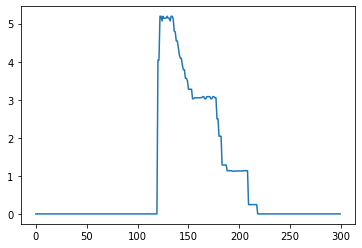

In [19]:
plt.plot(EV1[488800:489100]["power(kW)"].values);

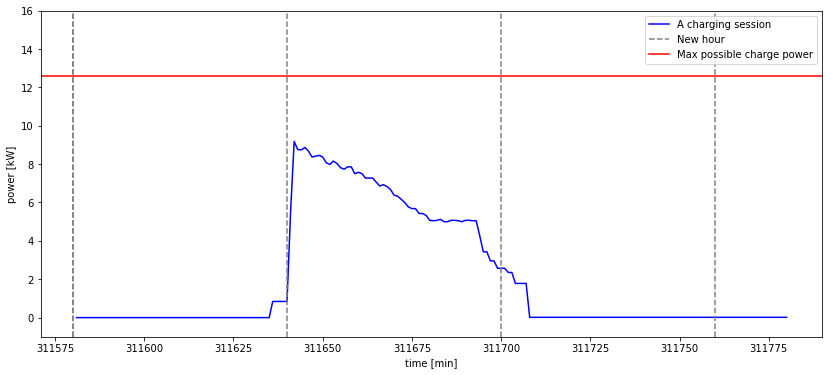

In [20]:
x  = EV1[311580:311780]["minute of year"].values
y1 = EV1[311580:311780]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(311580, 311780, 60):
    plt.axvline(x=i, color='grey', linestyle='--')
    
plt.axvline(x=311580, color='grey', linestyle='--', label='New hour')
    
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='red', linestyle='-')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend()
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

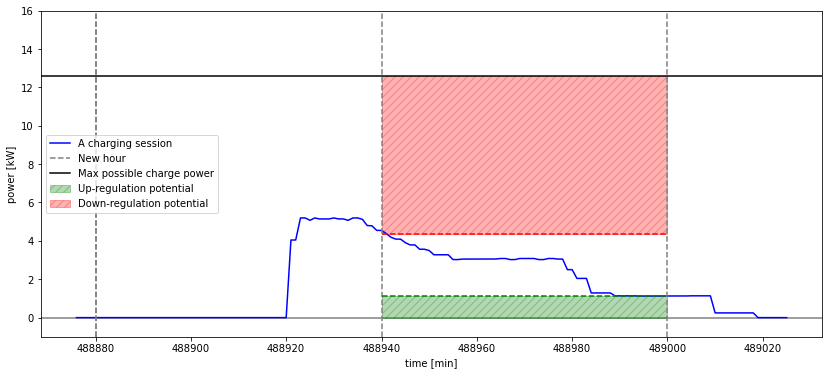

In [21]:
x  = EV1[488875:489025]["minute of year"].values
y1 = EV1[488875:489025]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(x, y1, label='A charging session', color='blue')

# plotting horizontal x-axis
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, zorder=0)

# Plotting vertical hour lines at intervals of 60 min.
for i in range(488880, 489025, 60):
    plt.axvline(x=i, color='grey', linestyle='--')

# plotting the first hour lines vertically in order to get a label
plt.axvline(x=488880, color='grey', linestyle='--', label='New hour')

# plotting horizontal max power line
plt.axhline(y=max(EV1["power(kW)"].values), label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=min(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='green', linestyle='--')
plt.axhline(y=max(EV1[488940:489000]["power(kW)"].values), xmin=0.437, xmax=0.8, color='red', linestyle='--')

# fill in area between the lines
plt.fill_between(x, min(EV1[488940:489000]["power(kW)"].values), 0, where=(x > 488939) & (x < 489001), color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(x, max(EV1["power(kW)"].values), max(EV1[488940:489000]["power(kW)"].values), where=(x > 488939) & (x < 489001), color='red', alpha=0.3, label='Down-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.legend(loc='center left')
plt.ylim(-1, 16)

# title
# plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

# Plot 1.2

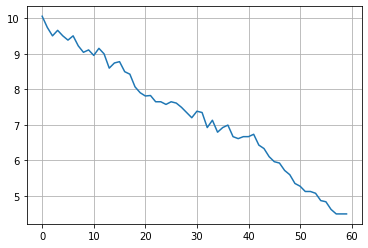

In [35]:
plt.plot(EV1[492400:492460]['power(kW)'].values)
plt.grid(True)
plt.show()

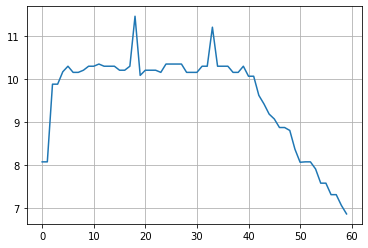

In [72]:
plt.plot(EV1[277406:277466]['power(kW)'].values)
plt.grid(True)
plt.show()

In [182]:
import os
import glob
from fnmatch import fnmatch

csv_filer = [os.path.join(base_path, fil) for fil in os.listdir(base_path) if fnmatch(fil, '*.csv')]

for csv_fil in csv_filer:
    print(csv_fil)
    
dataframes1_2 = [pd.read_csv(csv_fil, nrows=30000) for csv_fil in csv_filer] #delete "nrows=30000" if the entire csv files needs to be read

C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_1544.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2067.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2113.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2187.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2188.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2220.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2222.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2225.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2226.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2229.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2243.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2244.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2249.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2

C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4704.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4705.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4706.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4707.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4709.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4710.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4711.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4712.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4715.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4716.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4717.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4719.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4720.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_4

In [92]:
dataframes1_2

[       energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                      0.0        0.0        0.0                 0.0  \
 1                      0.0        0.0        0.0                 0.0   
 2                      0.0        0.0        0.0                 0.0   
 3                      0.0        0.0        0.0                 0.0   
 4                      0.0        0.0        0.0                 0.0   
 ...                    ...        ...        ...                 ...   
 29995                  0.0        0.0        0.0                 0.0   
 29996                  0.0        0.0        0.0                 0.0   
 29997                  0.0        0.0        0.0                 0.0   
 29998                  0.0        0.0        0.0                 0.0   
 29999                  0.0        0.0        0.0                 0.0   
 
        max_effect of charger (kW)  minute of year  
 0                            14.4             1.0  
 1              

In [93]:
len(dataframes1_2)

1509

In [96]:
sum_df = sum(dataframes1_2)

summeret plot:

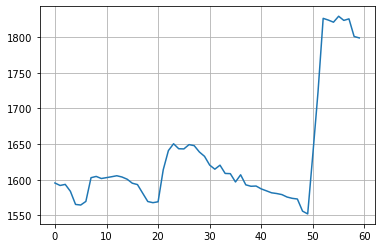

In [97]:
plt.plot(sum_df[11410:11470]['power(kW)'].values)
plt.grid(True)
plt.show()

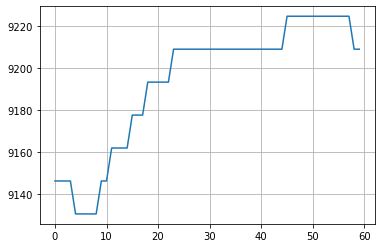

In [98]:
plt.plot((sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values)
plt.grid(True)
plt.show()

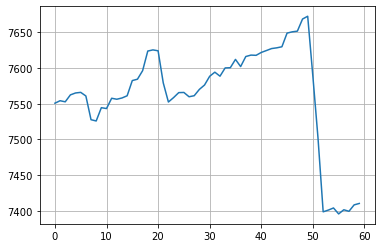

In [99]:
plt.plot((sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values-sum_df[11410:11470]['power(kW)'].values)
plt.grid(True)
plt.show()

In [203]:
# minimum difference 
down_reg = min((sum_df[11410:11470]['max_effect of charger (kW)']/1509)*sum_df[11410:11470]['connected (1 or 0)']-sum_df[11410:11470]['power(kW)'])
print(down_reg)
up_reg = min(sum_df[11410:11470]['power(kW)'].values)
print(up_reg)

7395.570957490685
1552.067172573902


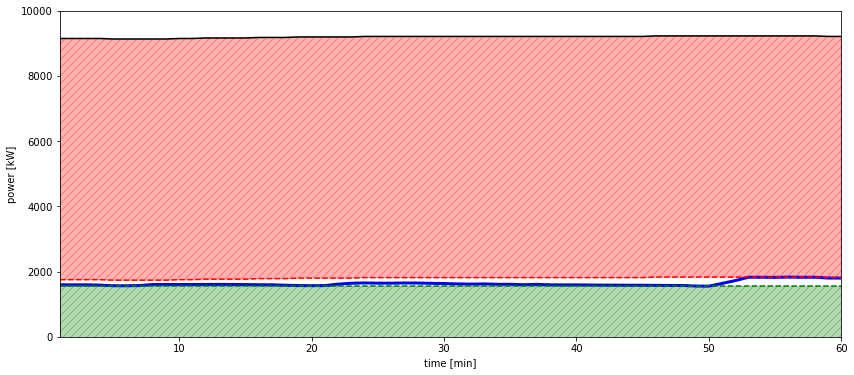

In [294]:
y1 = sum_df[11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=up_reg, color='green', linestyle='--')
plt.plot(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values - down_reg, color='red', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), up_reg, 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values, (sum_df[11410:11470]['max_effect of charger (kW)'].values/1509)*sum_df[11410:11470]['connected (1 or 0)'].values-down_reg, where=None, color='red', alpha=0.3, label='Down-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(-1, 10000)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

Plotting some of the chargers that are connected at the time period above:

In [177]:
# find CB with big max power vs min power differences
for k in range(1,1000):
    if max(dataframes1_2[k]["power(kW)"][11410:11470])-min(dataframes1_2[k]["power(kW)"][11410:11470]) > 3 and min(dataframes1_2[k]["power(kW)"][11410:11470]) > 0.1:
        print(k)

15
103
455
578
617


In [180]:
dataframes1_2[103]["power(kW)"][11410:11470].values

array([0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 0.10080399, 0.10080399, 0.10080399, 0.10080399,
       0.10080399, 7.12941175, 7.34399999, 7.12941175, 7.30799999,
       7.12941175, 7.34399999, 7.12941175, 7.34399999, 7.30799999,
       7.30799999, 7.19999999, 7.27199999, 7.19999999, 7.34399999,
       7.23564355, 7.19999999, 7.34399999, 7.34399999, 7.19999999,
       7.27128711, 7.27199999, 7.34399999, 7.19999999, 7.34399999,
       7.27128711, 7.34399999, 7.19999999, 7.34399999, 7.19999999,
       7.27128711, 7.27128711, 7.34399999, 7.19999999, 7.34399999,
       7.19999999, 7.27128711, 7.19999999, 7.34399999, 7.19999999])

we pick the following three CBs:
15
455
617
maybe CB 103

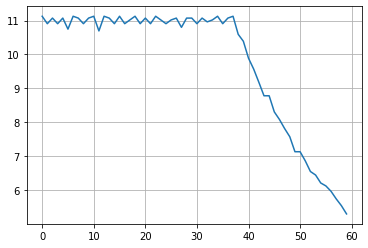

In [181]:
plt.plot(dataframes1_2[15]["power(kW)"][11410:11470].values*dataframes1_2[15]["connected (1 or 0)"][11410:11470].values)
plt.grid(True)
plt.show()

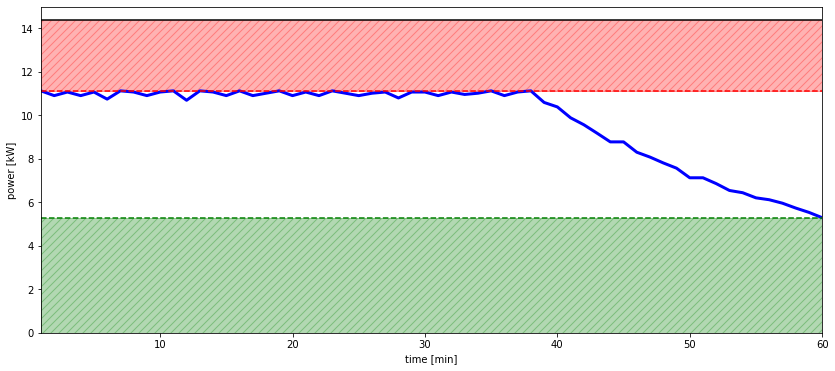

In [295]:
y1 = dataframes1_2[15][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[15][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[15][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[15][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[15][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[15][11410:11470]["power(kW)"]), max(dataframes1_2[15][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 15)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

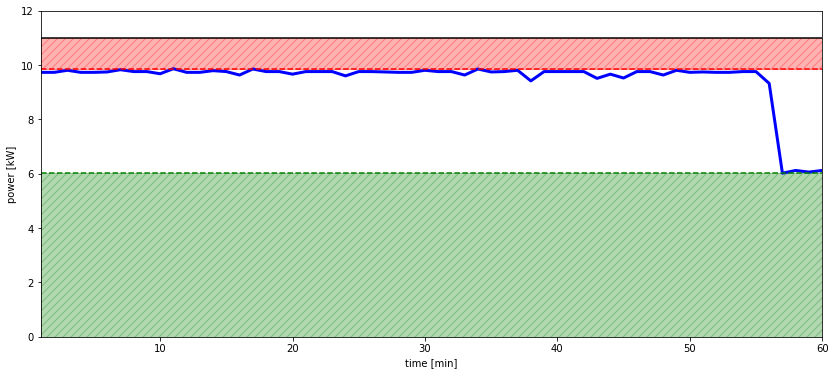

In [296]:
y1 = dataframes1_2[455][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[455][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[455][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[455][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[455][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[455][11410:11470]["power(kW)"]), max(dataframes1_2[455][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 12)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

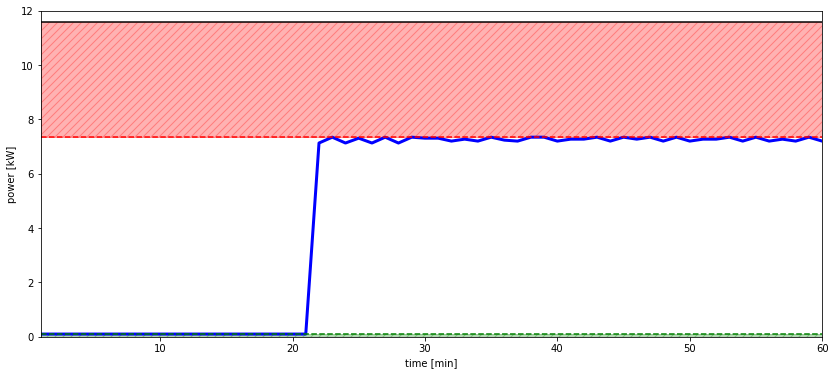

In [297]:
y1 = dataframes1_2[103][11410:11470]["power(kW)"].values

plt.figure(figsize=(14, 6))

plt.plot(np.linspace(1, 60, 60), y1, label='A charging session', color='blue', linewidth=3)

# plotting horizontal max power line
plt.plot(np.linspace(1, 60, 60), dataframes1_2[103][11410:11470]['max_effect of charger (kW)'].values, label='Max possible charge power', color='black', linestyle='-')

# Plotting horizontal lines to mark potential bid-capacity limits
plt.axhline(y=max(dataframes1_2[103][11410:11470]["power(kW)"]), color='red', linestyle='--')
plt.axhline(y=min(dataframes1_2[103][11410:11470]["power(kW)"]), color='green', linestyle='--')

# fill in area between the lines
plt.fill_between(np.linspace(1, 60, 60), min(dataframes1_2[103][11410:11470]["power(kW)"]), 0,  where=None, color='green', alpha=0.3, label='Up-regulation potential', hatch='///')
plt.fill_between(np.linspace(1, 60, 60), max(dataframes1_2[103][11410:11470]["power(kW)"]), max(dataframes1_2[103][11410:11470]['max_effect of charger (kW)']),  where=None, color='red', alpha=0.3, label='Up-regulation potential', hatch='///')

# Displaying the legend
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
#plt.legend(loc='center left')
plt.ylim(0, 12)
plt.xlim(1, 60)

# title
#plt.title("1st hour interval: Max_power: 3.029 , Min_power: 0.0", y=1.02, fontsize=10, fontweight='bold')

# grid
#plt.grid(True)
plt.show()

# plot 2

In [22]:
min(EV1[15540:15600]['power(kW)'].values)

0.10823812365604

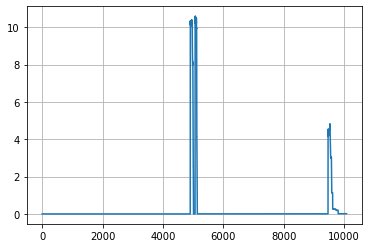

In [23]:
plt.plot(EV1[1440*0:1440*7]['power(kW)'].values)
plt.grid(True)
plt.show()

In [24]:
hey = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)
hey2 = copy.deepcopy(EV1[1440*7*0:1440*7*1]['power(kW)'].values)

for i in range (2, 11):
    hey += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values
    
for i in range (2, 51):
    hey2 += EV1[1440*7*(i-1):1440*7*i]['power(kW)'].values

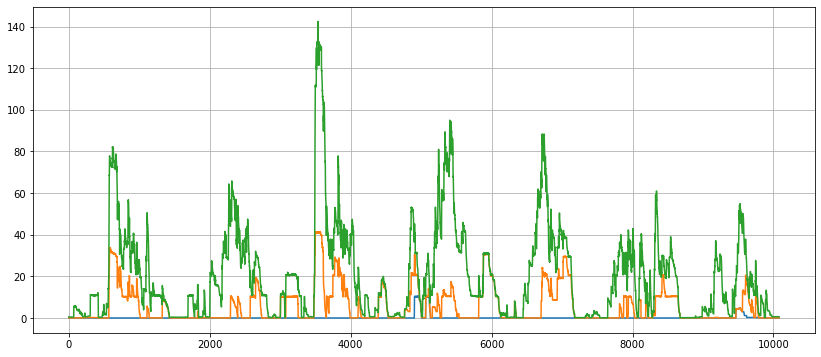

In [25]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.plot(hey, label="10 chargers")
plt.plot(hey2, label="50 chargers")
plt.grid(True)
plt.show()

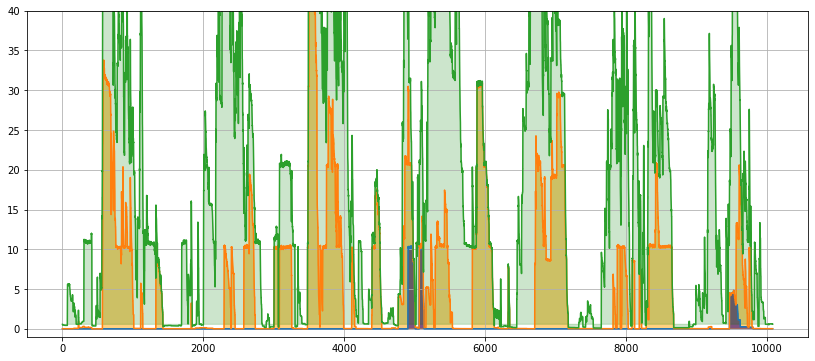

In [26]:
plt.figure(figsize=(14, 6))

plt.plot(EV1[1440*0:1440*7]['power(kW)'].values, label="1 charger")
plt.fill(EV1[1440*0:1440*7]['power(kW)'].values, color='blue', alpha=1)
plt.plot(hey, label="10 chargers")
plt.fill(hey, color='orange', alpha=0.5)
plt.plot(hey2, label="50 chargers")
plt.fill(hey2, color='green', alpha=0.2)
plt.grid(True)
plt.ylim(-1, 40)
plt.show()

# load data to the following plots

### There will be made 3 datafremes that respectively contains 1500, 150 and 15 chargers

In [73]:
import os
import glob
from fnmatch import fnmatch

csv_filer = [os.path.join(base_path, fil) for fil in os.listdir(base_path) if fnmatch(fil, '*.csv')]

for csv_fil in csv_filer:
    print(csv_fil)
    
dataframes = [pd.read_csv(csv_fil) for csv_fil in csv_filer] 


C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_1544.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2067.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2113.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2187.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2188.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2220.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2222.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2225.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2226.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2229.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2243.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2244.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2249.csv
C:\Users\ASUS\Documents\11. sem - kand\Data\EV\cleaned data\CD_2

In [85]:
dataframes

[       energy_resovior (%)  SoC (kWh)  power(kW)  connected (1 or 0)   
 0                      0.0        0.0        0.0                 0.0  \
 1                      0.0        0.0        0.0                 0.0   
 2                      0.0        0.0        0.0                 0.0   
 3                      0.0        0.0        0.0                 0.0   
 4                      0.0        0.0        0.0                 0.0   
 ...                    ...        ...        ...                 ...   
 29995                  0.0        0.0        0.0                 0.0   
 29996                  0.0        0.0        0.0                 0.0   
 29997                  0.0        0.0        0.0                 0.0   
 29998                  0.0        0.0        0.0                 0.0   
 29999                  0.0        0.0        0.0                 0.0   
 
        max_effect of charger (kW)  minute of year  
 0                            14.4             1.0  
 1              

In [75]:
print(dataframes[1].iloc[1])

energy_resovior (%)            0.00
SoC (kWh)                      0.00
power(kW)                      0.00
connected (1 or 0)             0.00
max_effect of charger (kW)    12.24
minute of year                 2.00
Name: 1, dtype: float64


In [ ]:
print(dataframes[1].iloc[:, 2])

In [ ]:
plt.plot(dataframes[3].iloc[:, 2].values)
plt.xlim(1440*7*0,1440*7*1)
plt.grid(True)
plt.show()

In [ ]:
dataframes[0:3]

#### collecting first 1500 dataframes in one 

In [ ]:
print(len(dataframes))
print(len(dataframes[0:1500]))

In [ ]:
# Initialize a dataframe to hold the sums
sum_df_1500 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:1500]:
    sum_df_1500 = sum_df_1500.add(df, fill_value=0)

# Display the resulting dataframe
print(sum_df_1500)

#### collecting first 150 dataframes in one 

In [ ]:
len(dataframes[0:150])

In [ ]:
# Initialize a dataframe to hold the sums
sum_df_150 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:150]:
    sum_df_150 = sum_df_150.add(df, fill_value=0)

#### collecting first 15 dataframes in one 

In [ ]:
len(dataframes[0:15])

In [ ]:
# Initialize a dataframe to hold the sums
sum_df_15 = pd.DataFrame()

# Sum the columns across all dataframes
for df in dataframes[0:15]:
    sum_df_15 = sum_df_15.add(df, fill_value=0)

# plot 3 - show power output aggregated vs single charger

In [ ]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['power(kW)'].values/len(dataframes[0:1500]), label='Aggregated power average [kW]')
plt.plot(EV1[1440*7*3:1440*7*4]['power(kW)'].values, label='Power from one charger')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*7, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.ylim(0,1)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers vs 1 charger")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['connected (1 or 0)'].values)

for i in range(0, 1440*7, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')
plt.ylim(0,400)
plt.xlabel('time [min]')
plt.ylabel('Amount of connections')
plt.title("How many chargers are connected out of 1500 chargers")
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*7*0:1440*2]['power(kW)'].values)
plt.grid(True)
plt.show()

# Plot 4 - seasonal differences in charging

In [ ]:
plt.plot(sum_df_1500[1440*7*3:1440*7*4]['power(kW)'].values/len(dataframes[0:1500]), label='april')
plt.plot(sum_df_1500[1440*7*16:1440*7*17]['power(kW)'].values/len(dataframes[0:1500]), label='juli')
plt.plot(sum_df_1500[1440*7*29:1440*7*30]['power(kW)'].values/len(dataframes[0:1500]), label='oktober')
plt.plot(sum_df_1500[1440*7*42:1440*7*43]['power(kW)'].values/len(dataframes[0:1500]), label='januar')
#plt.plot(EV1[1440*7*0:1440*7*52]['power(kW)'].values, label='Power from one charger')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*7*1, 1440):
    plt.axvline(x=i, color='grey', linestyle='--')

plt.ylim(0,1.5)
plt.xlim(1440*7*0,1440*7*1)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different seasons")
plt.legend()
plt.grid(True)
plt.show()

# Plot 5 - weekday tendencies in charging

In [ ]:
plt.plot(sum_df_1500[1440*1*3:1440*1*4]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*4:1440*1*5]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*6:1440*1*7]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*7:1440*1*8]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*8:1440*1*9]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*9:1440*1*10]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*1*101:1440*1*102]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*102:1440*1*103]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*103:1440*1*104]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*104:1440*1*105]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*105:1440*1*106]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*106:1440*1*107]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*107:1440*1*108]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(sum_df_1500[1440*1*199:1440*1*200]['power(kW)'].values/len(dataframes[0:1500]), label='lørdag')
plt.plot(sum_df_1500[1440*1*200:1440*1*201]['power(kW)'].values/len(dataframes[0:1500]), label='søndag')
plt.plot(sum_df_1500[1440*1*201:1440*1*202]['power(kW)'].values/len(dataframes[0:1500]), label='mandag')
plt.plot(sum_df_1500[1440*1*202:1440*1*203]['power(kW)'].values/len(dataframes[0:1500]), label='tirsdag')
plt.plot(sum_df_1500[1440*1*203:1440*1*204]['power(kW)'].values/len(dataframes[0:1500]), label='onsdag')
plt.plot(sum_df_1500[1440*1*204:1440*1*205]['power(kW)'].values/len(dataframes[0:1500]), label='torsdag')
plt.plot(sum_df_1500[1440*1*205:1440*1*206]['power(kW)'].values/len(dataframes[0:1500]), label='fredag')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers in different weekdays")
plt.legend()
plt.grid(True)
plt.show()

# Plot 6 - daily difference between aggregating sizes

In [ ]:
plt.plot(sum_df_1500[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:1500]), label='1500 agg. power average [kW]')
plt.plot(sum_df_150[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:150]), label='150 agg. power average [kW]')
plt.plot(sum_df_15[1440*1*5:1440*1*6]['power(kW)'].values/len(dataframes[0:15]), label='15 agg. power average [kW]')

# Plotting vertical lines at intervals of 2 from 0 to 10
for i in range(0, 1440*1, 60):
    plt.axvline(x=i, color='grey', linestyle='--', alpha=0.2)

plt.ylim(0,2)
plt.xlabel('time [min]')
plt.ylabel('power [kW]')
plt.title("1500 chargers vs 150 chargers vs 15 chargers - Monday 28/03/2022")
plt.legend()
plt.grid(True)
plt.show()

# Plot 7 - Difference in connections during a random week

In [ ]:
def format_func(value, tick_number):
    return f'{value / (60*24):.2f}d'

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(sum_df_1500[1440*7*3:1440*7*4]['connected (1 or 0)'].values)

for i in range(0, 1440*7, 1440):
    axs[0].axvline(x=i, color='grey', linestyle='--')
axs[0].set_ylim(0,500)
axs[0].set_xlabel('time [min]')
axs[0].set_ylabel('Amount of connections')
axs[0].set_title("How many chargers are connected out of 1500 chargers")
axs[0].xaxis.set_major_formatter(FuncFormatter(format_func))

axs[0].grid(True)


axs[1].plot(sum_df_150[1440*7*3:1440*7*4]['connected (1 or 0)'].values, color = 'green')

for i in range(0, 1440*7, 1440):
    axs[1].axvline(x=i, color='grey', linestyle='--')
axs[1].set_ylim(0,60)
axs[1].set_xlabel('time [min]')
axs[1].set_ylabel('Amount of connections')
axs[1].set_title("How many chargers are connected out of 150 chargers")
axs[1].grid(True)


axs[2].plot(sum_df_15[1440*7*3:1440*7*4]['connected (1 or 0)'].values, color = 'red')

for i in range(0, 1440*7, 1440):
    axs[2].axvline(x=i, color='grey', linestyle='--')
axs[2].set_ylim(0,10)
axs[2].set_xlabel('time [min]')
axs[2].set_ylabel('Amount of connections')
axs[2].set_title("How many chargers are connected out of 15 chargers")
axs[2].grid(True)


# Adjust the layout so that plots are not overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create some example data
x = [i for i in range(0, 301, 60)]  # minutes from 0 to 300
y = [1, 2, 3, 4, 5, 6]

# Define a function to convert minutes to days for the x-axis labels
def format_func(value, tick_number):
    return f'{value / (60*24):.2f}d'

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data with x values in minutes
ax.plot(x, y)

# Set labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Y values')
ax.set_title('Plot with X-axis in Days')

# Set x-axis formatter
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

# Display the plot
plt.show()

In [ ]:
x